In [4]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import os


In [6]:
path_data = "../data/lobster"


In [19]:
files = os.listdir(path_data)
path_files = list(map(lambda x: os.path.join(path_data,x), filter(lambda x: x.endswith("orderbook_50.csv"), files)))

In [21]:
path_files

['../data/lobster/MSFT_2012-06-21_34200000_37800000_orderbook_50.csv',
 '../data/lobster/AAPL_2012-06-21_34200000_37800000_orderbook_50.csv',
 '../data/lobster/SPY_2012-06-21_34200000_37800000_orderbook_50.csv']

In [70]:
book = path_files[0]
df_book = pd.read_csv(book, header=None)
# df_book = df_book.drop(columns=filter(lambda x: x%2==1, df_book.columns))

In [39]:
df_book = df_book.replace([9999999999, -9999999999], value=np.nan)

In [50]:
df_change = df_book.apply(lambda x: x/x[0]-1, axis=1)

In [44]:
idx = df_book.iloc[:,-1].where(pd.isna, False).fillna(True)

0          True
1          True
2          True
3          True
4          True
          ...  
141502    False
141503    False
141504    False
141505    False
141506    False
Name: 198, Length: 141507, dtype: bool

In [56]:
df_range = df_change.loc[:].apply(lambda x: x.dropna()[-2:].tolist(), axis=1, result_type='expand')

(array([1.4141061e+07, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 6.2700000e+02]),
 array([-0.99967742,  5.45815277, 11.91598296, 18.37381315, 24.83164334,
        31.28947353, 37.74730372, 44.20513391, 50.6629641 , 57.12079429,
        63.57862448]),
 <BarContainer object of 10 artists>)

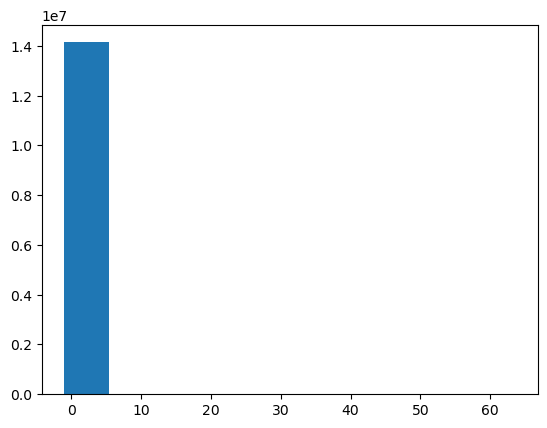

In [62]:
# df_change.plot.hist()
plt.hist(df_change.to_numpy().reshape(-1))

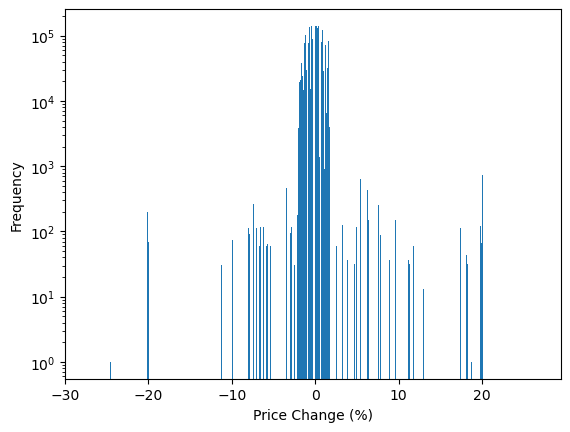

0.9960035899284134

In [107]:

range = 0.6
price_data = df_change.where(lambda x:  (x>-range), np.nan).where(lambda x:  (x<range), np.nan).to_numpy().reshape(-1)*100
plt.hist(price_data, bins=4000)
plt.xlabel("Price Change (%)")
plt.ylabel("Frequency")
plt.yscale("log")
plt.show()

range_1 = 5
len(list(filter(lambda x: x>-range_1 and x< range_1, price_data)))/len(price_data)


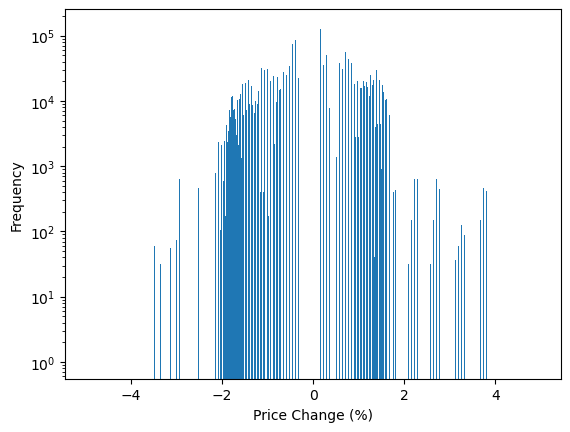

In [110]:

range = 0.05
price_data = df_change.where(lambda x:  (x>-range), np.nan).where(lambda x:  (x<range), np.nan).to_numpy().reshape(-1)*100
plt.hist(price_data, bins=4000)
plt.xlabel("Price Change (%)")
plt.ylabel("Frequency")
plt.yscale("log")
plt.show()

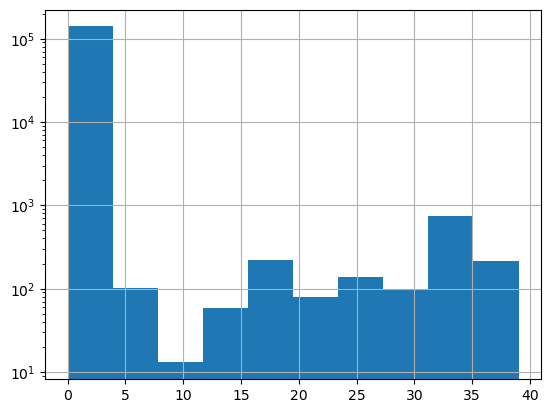

In [138]:

range = 0.05
outliner = df_change.where(lambda x:  ((x<-range) + (x>range)), np.nan)#.to_numpy().reshape(-1)*100
outliner.T.count().hist(bins=10)
plt.yscale('log')

In [129]:
outliner.dropna(how='all',axis=1)

,68,72,76,80,82,84,86,88,90,92,...,180,182,184,186,188,190,192,194,196,198
0,NaN,NaN,NaN,0.054534,-0.05292,0.062278,-0.056147,0.074217,-0.059697,0.090352,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,0.054534,-0.05292,0.062278,-0.056147,0.074217,-0.059697,0.090352,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,-0.05292,0.054534,-0.056147,0.062278,-0.059697,0.074217,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,-0.05292,0.054534,-0.056147,0.062278,-0.059697,0.074217,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,-0.05292,0.054534,-0.056147,0.062278,-0.059697,0.074217,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141502,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
141503,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
141504,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
141505,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [134]:
outliner.count(axis=1).unique()

array([35, 34, 33, 36, 37, 38, 39, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23,
       22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10,  9,  8,  7,  6,
        5,  4,  3,  2,  1,  0])

In [75]:
df_book.loc[:10, 130:158]

,130,131,132,133,134,135,136,137,138,139,...,149,150,151,152,153,154,155,156,157,158
0,249900,100,392400,100,248000,3500,20000000,100,247800,200,...,0,233800,400,9999999999,0,225300,100,9999999999,0,100
1,249900,100,392400,100,248000,3500,20000000,100,247800,200,...,0,233800,400,9999999999,0,225300,100,9999999999,0,100
2,249900,100,372100,2400,248000,3500,392400,100,247800,200,...,0,233800,400,9999999999,0,225300,100,9999999999,0,100
3,249900,100,372100,2400,248000,3500,392400,100,247800,200,...,0,233800,400,9999999999,0,225300,100,9999999999,0,100
4,249900,100,372100,2400,248000,3500,392400,100,247800,200,...,0,233800,400,9999999999,0,225300,100,9999999999,0,100
5,249900,100,372100,2400,248000,3500,392400,100,247800,200,...,0,233800,400,9999999999,0,225300,100,9999999999,0,100
6,249900,100,392400,100,248000,3500,20000000,100,247800,200,...,0,233800,400,9999999999,0,225300,100,9999999999,0,100
7,249900,100,20000000,100,248000,3500,9999999999,0,247800,200,...,0,233800,400,9999999999,0,225300,100,9999999999,0,100
8,249900,100,9999999999,0,248000,3500,9999999999,0,247800,200,...,0,233800,400,9999999999,0,225300,100,9999999999,0,100
9,249900,100,9999999999,0,248000,3500,9999999999,0,247800,200,...,0,233800,400,9999999999,0,225300,100,9999999999,0,100


In [72]:
df_book

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,309900,3788,309500,300,310500,100,309300,3986,310600,100,...,-9999999999,0,9999999999,0,-9999999999,0,9999999999,0,-9999999999,0
1,309900,3788,309500,300,310500,200,309300,3986,310600,100,...,-9999999999,0,9999999999,0,-9999999999,0,9999999999,0,-9999999999,0
2,309900,3788,309500,300,310400,100,309300,3986,310500,200,...,-9999999999,0,9999999999,0,-9999999999,0,9999999999,0,-9999999999,0
3,309900,3788,309500,300,310400,100,309300,3986,310500,300,...,-9999999999,0,9999999999,0,-9999999999,0,9999999999,0,-9999999999,0
4,309900,3788,309500,300,310400,100,309300,3986,310500,300,...,-9999999999,0,9999999999,0,-9999999999,0,9999999999,0,-9999999999,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141502,308500,15930,308400,8789,308600,12473,308300,15196,308700,14603,...,303200,258,313400,150,303100,5000,313500,11500,303000,1400
141503,308500,15930,308400,8459,308600,12473,308300,15196,308700,14603,...,303200,258,313400,150,303100,5000,313500,11500,303000,1400
141504,308500,15930,308400,8459,308600,12473,308300,15196,308700,14523,...,303200,258,313400,150,303100,5000,313500,11500,303000,1400
141505,308500,16010,308400,8459,308600,12473,308300,15196,308700,14523,...,303200,258,313400,150,303100,5000,313500,11500,303000,1400
